<a href="https://colab.research.google.com/github/Ahmed-M-Elshazly/Homework-6/blob/main/Homework_6_Problem_1_a_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 6
#Problem2-a
#Ahmed Elshazly
#801420724

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import time
from datetime import timedelta
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
file_path = url = 'https://raw.githubusercontent.com/Ahmed-M-Elshazly/Database/main/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:

mainroad=housing.pop('mainroad')
guestroom=housing.pop('guestroom')
basement=housing.pop('basement')
hotwaterheatingd=housing.pop('hotwaterheating')
airconditioning=housing.pop('airconditioning')
prefarea=housing.pop('prefarea')
furnishingstatus=housing.pop('furnishingstatus')
housing.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [ ]:
stander=StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
housing[num_vars] = stander.fit_transform(housing[num_vars])
Y=housing.pop("price")
X=housing
Y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [ ]:
X = torch.tensor(X.values)
Y = torch.tensor(Y.values)
n_samples=X.shape[0]
n_val=int(0.2*n_samples)
shuffled_indices=torch.randperm(n_samples)

train_indices=shuffled_indices[ : -n_val]
val_indices=shuffled_indices[-n_val :]

train_X=X[train_indices]
train_Y=Y[train_indices]

val_X=X[val_indices]
val_Y=Y[val_indices]

train_X = train_X.float()
val_X = val_X.float()
train_Y = train_Y.float()
val_Y = val_Y.float()

In [ ]:
train_X.shape[1]

5

In [ ]:
def train (n_epochs, model, optimizer, loss_fn, x_train, y_train, x_val, y_val):
  train_rmse_list = []
  val_rmse_list = []
  r2_list = []
  for epoch in range(n_epochs+1):
    train_x_p = model(x_train).squeeze(-1)
    train_loss=loss_fn(train_x_p,y_train)

    with torch.no_grad():
      val_x_p = model(x_val).squeeze(-1)
      val_loss=loss_fn(val_x_p,y_val)
      #assert val_loss.requires_grad==False

      r2 = r2_score(val_x_p,y_val)


    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_rmse = torch.sqrt(train_loss).detach().item()
    train_rmse_list.append(train_rmse)
    val_rmse = torch.sqrt(val_loss).detach().item()
    val_rmse_list.append(val_rmse)

    r2_list.append(r2)

    if epoch % 500==0:
      print(f"Epoch {epoch}, Training RMSE {train_rmse:.4f}, Validation RMSE {val_rmse:.4f} , R2 {r2:.4f}")

  y_test_pred = model(x_val).squeeze(-1).detach()
  plt.figure(figsize=(10, 6))
  plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
  plt.scatter(y_val, y_test_pred)
  plt.title("Neural Network: Predictions vs Ground Truths (Test Set)")
  plt.xlabel("Ground Truths")
  plt.ylabel("Preedictions")

  return train_rmse_list, val_rmse_list, r2_list

In [ ]:
def get_model_size(model):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params, trainable_params

Epoch 0, Training RMSE 5041720.0000, Validation RMSE 5421568.5000 , R2 -10349855795466924.0000
Epoch 500, Training RMSE 3682457.7500, Validation RMSE 3837035.2500 , R2 -12.2863
Epoch 1000, Training RMSE 1720629.8750, Validation RMSE 1850388.7500 , R2 0.3667
Epoch 1500, Training RMSE 1462061.8750, Validation RMSE 1602073.8750 , R2 0.3685
Epoch 2000, Training RMSE 1348873.5000, Validation RMSE 1471122.1250 , R2 0.3623
Epoch 2500, Training RMSE 1293880.0000, Validation RMSE 1400034.0000 , R2 0.3638
Epoch 3000, Training RMSE 1266167.3750, Validation RMSE 1366930.5000 , R2 0.3712
Epoch 3500, Training RMSE 1247379.7500, Validation RMSE 1348509.5000 , R2 0.3791
Epoch 4000, Training RMSE 1234507.7500, Validation RMSE 1337273.6250 , R2 0.3759
Epoch 4500, Training RMSE 1227778.1250, Validation RMSE 1331668.3750 , R2 0.3745
Epoch 5000, Training RMSE 1221907.8750, Validation RMSE 1328423.3750 , R2 0.3744
Epoch 5500, Training RMSE 1215872.0000, Validation RMSE 1329078.3750 , R2 0.3715
Epoch 6000, T

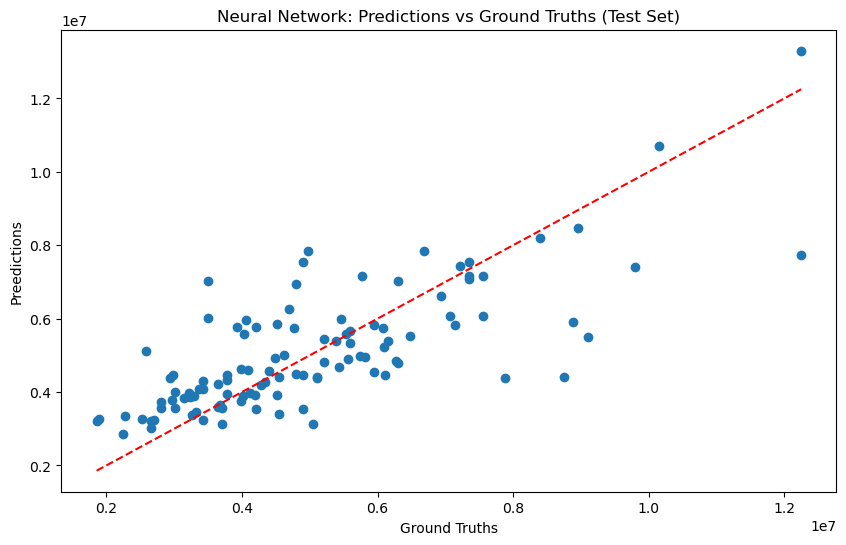

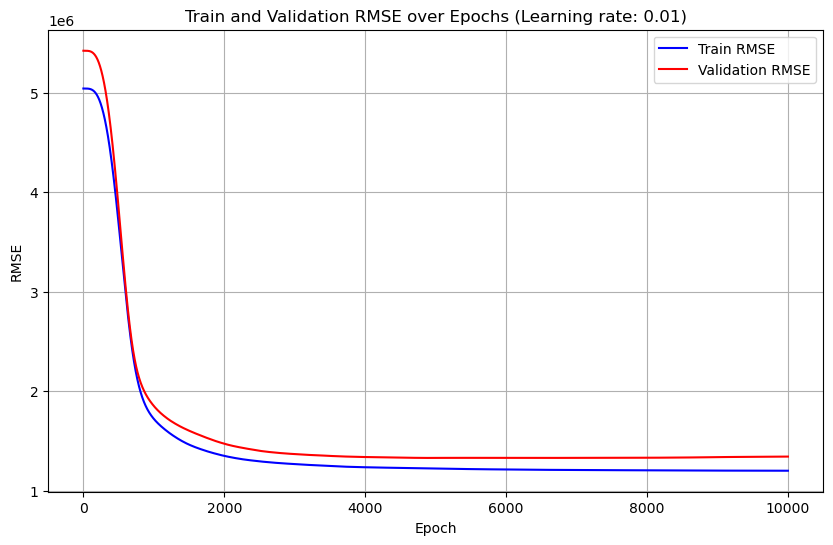

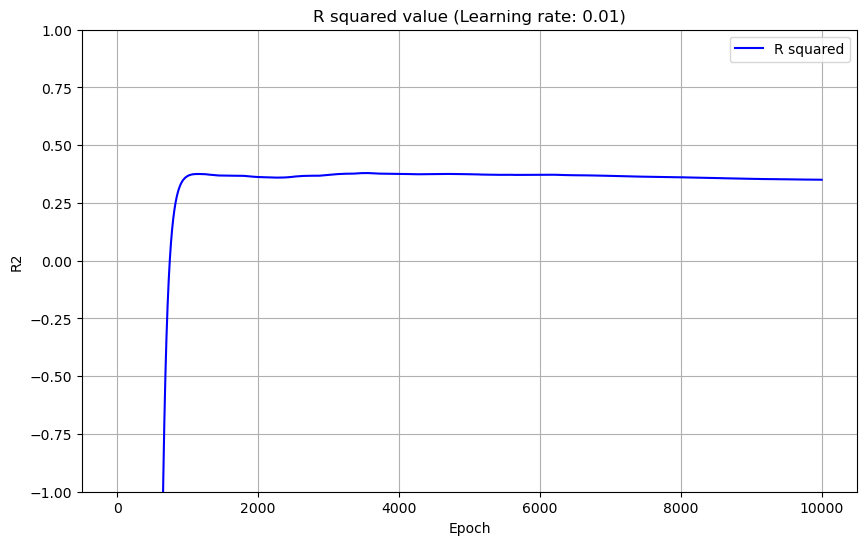

In [ ]:
number_of_epochs=10000
learning_rate=0.01
linear_model = nn.Sequential(
    nn.Linear(train_X.shape[1],64),
    nn.ReLU(),
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32, 1)
)
optimizer = optim.Adam(linear_model.parameters(), lr=learning_rate)
start_time = time.time()
train_rmse, val_rmse, R2=train(
      n_epochs=number_of_epochs,
      model=linear_model,
      optimizer=optimizer,
      loss_fn=nn.MSELoss(),
      x_train=train_X,
      y_train=train_Y,
      x_val=val_X,
      y_val=val_Y
  )
end_time = time.time()
elapsed_time = end_time - start_time
formatted_time = str(timedelta(seconds=elapsed_time))
# Print the training time
print(f"Training time for learning rate {learning_rate}: {formatted_time}")
total_params, trainable_params = get_model_size(linear_model)
print(f"Model with learning rate {learning_rate}:")
print(f"  Total parameters: {total_params}")
print(f"  Trainable parameters: {trainable_params}")
#print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")
plt.figure(figsize=(10, 6))
plt.plot(range(0, number_of_epochs+1), train_rmse, label='Train RMSE', color='blue')
plt.plot(range(0, number_of_epochs+1), val_rmse, label='Validation RMSE', color='red')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title(f'Train and Validation RMSE over Epochs (Learning rate: {learning_rate})')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(0, number_of_epochs+1), R2, label='R squared', color='blue')
plt.xlabel('Epoch')
plt.ylabel('R2')
plt.title(f'R squared value (Learning rate: {learning_rate})')
plt.legend()
plt.grid(True)
plt.ylim(-1, 1)
plt.show()